# Aufgabe 2

## Importe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mlxtend.data import loadlocal_mnist

# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

## Variabeln

In [3]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## Dataset

In [4]:
# Grab the MNIST dataset, it has already training and testing data
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the ffnn
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
[5 0 4 ... 5 6 8]


### Encode data

In [6]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## a) Model

In [7]:
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"] 
# softmax and exponential activation functions are not working in this setup therefore they are not included in this list

In [8]:
# define the cnn (Conv, Conv, Flatten, Output) with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation=ac, input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation=ac))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


## b) Training

In [9]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
        metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
        epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 31s 65ms/step - loss: 0.8202 - accuracy: 0.7729 - val_loss: 0.3369 - val_accuracy: 0.9036
Epoch 2/20
469/469 [==============================] - 30s 64ms/step - loss: 0.3522 - accuracy: 0.8950 - val_loss: 0.3679 - val_accuracy: 0.8862
Epoch 3/20
469/469 [==============================] - 30s 65ms/step - loss: 0.3271 - accuracy: 0.9037 - val_loss: 0.3042 - val_accuracy: 0.9119
Epoch 4/20
469/469 [==============================] - 31s 66ms/step - loss: 0.3109 - accuracy: 0.9094 - val_loss: 0.2869 - val_accuracy: 0.9166
Epoch 5/20
469/469 [==============================] - 30s 64ms/step - loss: 0.2975 - accuracy: 0.9141 - val_loss: 0.2814 - val_accuracy: 0.9196
Epoch 6/20
469/469 [==============================] - 31s 66ms/step - loss: 0.2826 - accuracy: 0.9182 - val_loss: 0.2536 - val_accuracy: 0.9278
Epoch 7/20
469/469 [==============================] - 30s 64ms/step - loss: 0.26

## c) Evaluation

In [10]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    # plot the training loss

    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



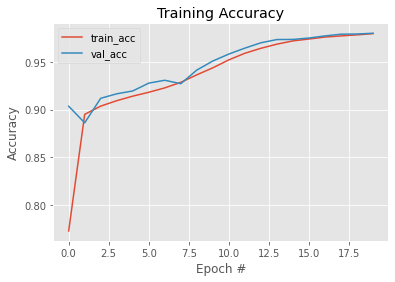

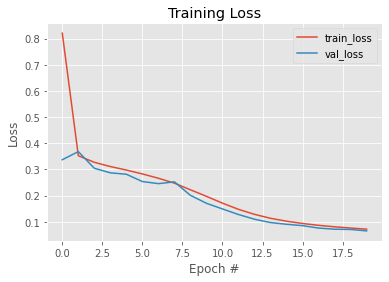


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.89      0.92      0.91      1010
           4       0.91      0.93      0.92       982
           5       0.94      0.84      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.90      0.92      1028
           8       0.89      0.91      0.90       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



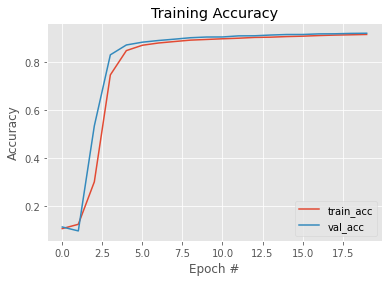

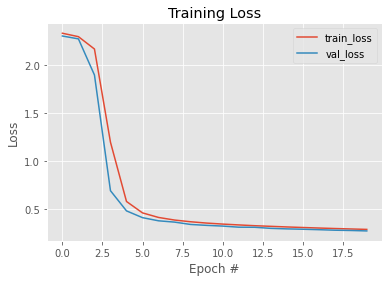


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



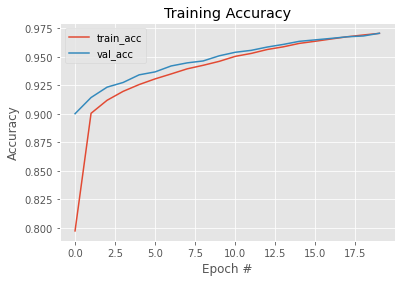

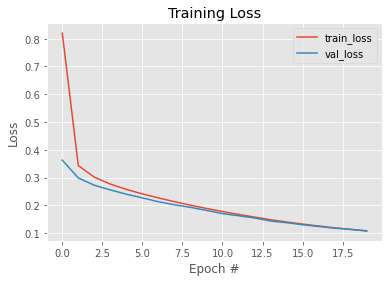


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.96      0.92      0.94      1010
           4       0.94      0.92      0.93       982
           5       0.93      0.91      0.92       892
           6       0.92      0.97      0.94       958
           7       0.96      0.91      0.93      1028
           8       0.93      0.92      0.93       974
           9       0.87      0.95      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



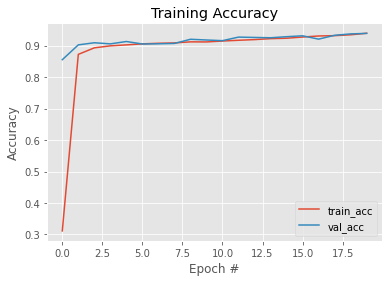

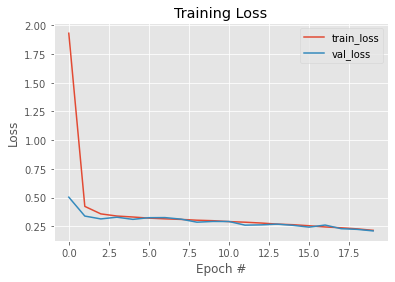


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.95      0.95       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



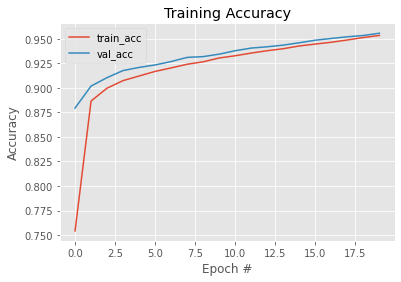

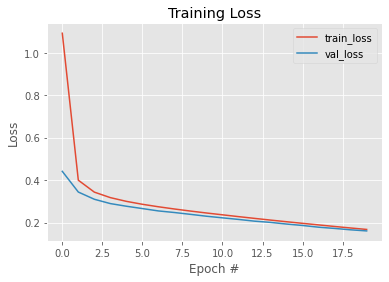


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



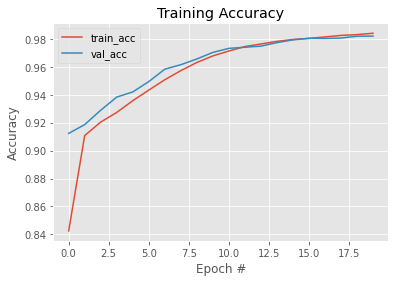

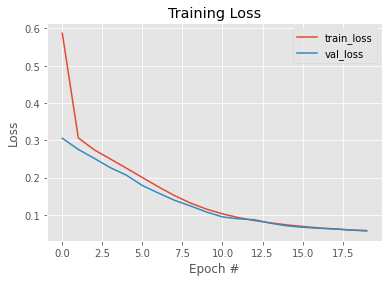


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



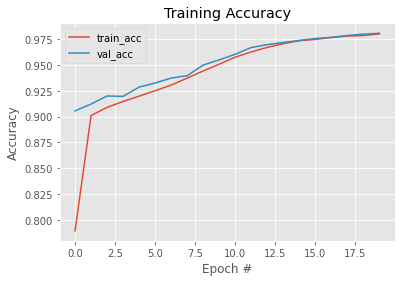

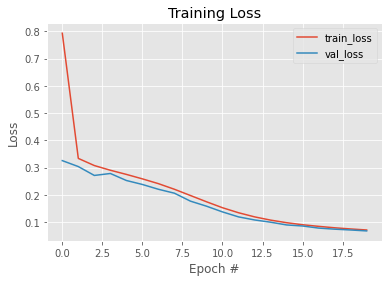

In [11]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
	    predictions.argmax(axis=1),
	    target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)

Beschreibung c)

## d) ANN vs. CNN
Im Vergleich zum ANN aus Aufgabe 1 hat das CNN hier eine bessere Performance. Beim einfachen ANN haben wir eine Accuracy von ca. 95% erreicht, wohingegen wir hier einen Wert von ca. 98% erreichen.
Grund hierfür ist, dass das CNN durch seine Beschaffenheit besser in der Lage ist mit Bilddaten umzugehen. Wir haben hier die Möglichkeit dem Netzwerk das Bild als Ganzes zu übergeben, sodass die Zusammenhänge innerhalb der 2-dimensoinalen Eingabe bestehen bleiben, wohingegen es beim ANN notwendig ist das Bild zeilenweise aneinander zu fügen, um einen eindimensionalen Vektor zu bekommen, welcher von der Input Schicht des ANN angenommen werden kann.


## e) Complexity

Hier soll die Anzahl der Schichten und deren Einfluss betrachtet werden.

Daten:  
Größe Filter: 3x3  
Neuronen Convolution Schicht: 32  
Pooling: 2x2 mit MaxPooling  
Startnetzwerk: Conv2D-Conv2D-MaxPooling-Flatten-Dense  
Erweiterung: eine weitere Conv2d + Pooling Schicht pro Schritt  

In [43]:
def buildModel(numHiddenLayers: int, ac):
    # print(numHiddenLayers)
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation=ac, input_shape=(28,28,1)))
    for i in range(numHiddenLayers):
        model.add(Conv2D(32, kernel_size=3, activation=ac))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(1, 1), padding="same"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    return model

In [44]:
max_hidden_layers = 5
def increaseLayers(ac = "sigmoid"):
    histories = []
    for i in range(max_hidden_layers):
        model = buildModel(i, ac)
        model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
        H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
        histories.append((H, i))
    return histories

In [47]:
print("[INFO] training network with sigmoid activation")
hist_s = increaseLayers()

[INFO] training network with sigmoid activation


In [48]:
print("[INFO] training network with relu activation")
hist_r = increaseLayers("relu")

[INFO] training network with relu activation


In [49]:
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, max_hidden_layers)]

def plotHistory(histories):
    plt.style.use("ggplot")
    plt.figure()
    for i in range(len(histories)):
        history, rep = histories[i]
        plt.plot(np.arange(0, epochs), history.history["accuracy"], color=colors[i], label="train_acc" + str(rep))
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], color=colors[i], label="val_acc" + str(rep), linestyle="dotted")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", ncol=2)
    plt.show()

[INFO] evaluating network with sigmoid activation


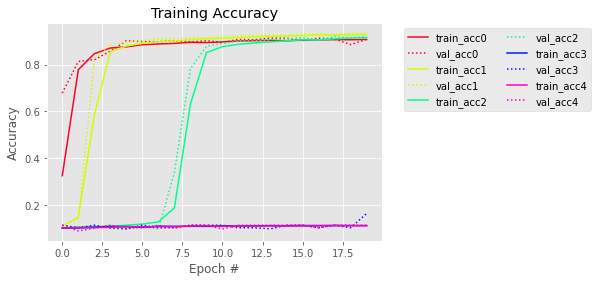

In [50]:
print("[INFO] evaluating network with sigmoid activation")
plotHistory(hist_s)

[INFO] evaluating network with relu activation


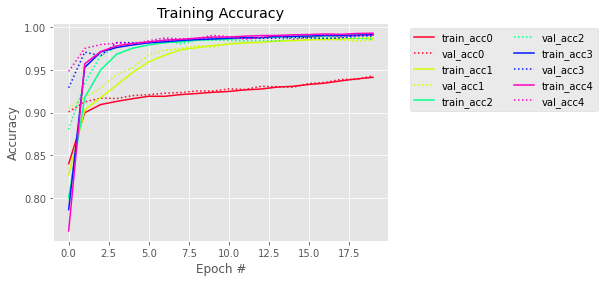

In [51]:
print("[INFO] evaluating network with relu activation")
plotHistory(hist_r)

## f) As we said before, CNNs are good at image data. What could be the reasons behind this?

Um zu verstehen warum CNNs so gut mit Bilddaten umgehen können, müssen wir zunächst betrachten wie Bilder überhaupt maschinell repräsentiert sind. Im Gegensatz zur menschlichen Wahrnehmung eines Bildes, wo das Bild als Ganzes mit konkreten Formen und Mustern wahrgenommen wird, sieht eine Maschine lediglich eine Matrix mit Zahlen welche die einzelnen Pixel repräsentieren.

![Bildpixel Matrixdarstellung](Bilder/pixel.png)

Die Aufgabe des Neuronalen Netzes, sei es ein CNN oder ANN, ist es nun anhand dieser Matrix, und des vorgegebenen Labels Rückschlüsse auf den Inhalt des Bildes zu ziehen.

Wenn wir nun genauer auf die Architekturen der neuronalen Netze eingehen, wird schnell ersichtlich, dass das CNN eindeutig im Vorteil ist.

Die grundlegende Architektur eines ANN ist in folgendem Bild illustriert:

![ANN](Bilder/ann.png)

Man beachte, dass dieses Netzwerk im Grunde aus drei Schichten aufgebaut ist. Den Eingang, die Schicht welche die Daten annimmt, stellt das Input Layer dar. Die anschließende Weiterleitung der Daten erfolgt über die Hidden Layers. Schließlich gelangen die Daten zum Output Layer wo dann die Ausgabe erzeugt wird. Wenn wir nun die Form der Daten, welche hier durch die einzelnen Schichten gereicht werden, genauer betrachtet, stellen wir fest, dass es sich hier um einen Vektor der Form 1xn handelt.

Das „Problem“ das wir nun mit Bilddaten haben, ist dass diese, wenn man sie als Matrix betrachtet, eben nicht der Form 1xn, sondern vielmehr der Form mxn, bzw. nxn für quadratische Bilder, entsprechen.

Würden wir nun ein ANN verwenden, so währe eine Transformation des Bildes notwendig. Aus der mxn Matrix müssten wir zunächst einen Vektor der Form 1xn erzeugen. Dieses Vorgehen wird „Flattening“ genant und ist im folgenden illustriert:

1 2 3

4 5 6        —>        1 2 3 4 5 6 7 8 9

7 8 9

Die Verwendung von Bilddaten in ANNs ist somit grundsätzlich möglich, das Flattening bringt jedoch Probleme mit sich, welche sich durchaus negativ auf die Performance eines solchen Modells auswirken werden.
Durch das Flattening sind ANNs folglich nicht mehr in der Lage, Objekte in einem Bild unabhängig von der Position des Objekts im Bild zu erkennen. Das gleiche Objekt an einer anderen Position im Bild hätte einen völlig anderen Input-Vektor und würde somit nicht mehr, oder nur sehr erschwert, als gleichartig erkannt werden.
Ein weiteres Problem ergibt sich wenn wir nun einmal annehmen, dass die Bilder die wir klassifizieren wollen, nicht wie z.B. beim MNIST Datensatz 28x28 Pixel haben, sondern es sich um Bilder der Größe 1000x1000 Pixel handelt. Der Input-Vektor der 28x28 Pixel Bilder hätte eine Länge von 784, was noch durchaus vertretbar wäre. Der Vektor der Bilder mit 1000x1000 Pixel hätte eine Länge von 1000000, was bedeutet, dass das Input Layer ebenfalls 1000000 Neuronen beinhalten müsste. Das Netzwerk wäre damit direkt extrem groß, was jedoch dem grundlegenden Ziel, die Netzwerke möglichst klein und wenig komplex zu halten, widerspricht.

Nun stellt sich die Frage wie denn anhand von Bilddaten erfolgversprechend mit Methoden aus dem Bereich des Deep Learning Klassifizierungsaufgaben durchgeführt werden können. Da ANNs aufgrund ihrer Beschaffenheit nur bedingt geeignet sind um mit Bilddaten zu arbeiten betrachten wir im Folgenden Convolutional Neural Networks (CNN).

Ein CNN besteht im wesentlichen aus Filtern (genannt Convolutional Layer) und Aggregations-Schichten (genannt Pooling Layer), die sich abwechselnd wiederholen, und am Ende aus einer oder mehreren Schichten von „normalen“ vollständig verbundenen Neuronen (genannt Dense oder auch Fully Connected Layer).

![CNN](Bilder/cnn.png)

Der große Unterschied vom CNN gegenüber dem ANN ist, das wir hier eine Kombination aus Convolutional und Pooling Layers, gefolgt von einem Fully Connected Netzwerk, den Dense Layers verwenden. Innerhalb dieser Schichten wie das Eingabe Datum, gefaltet und damit Features extrahiert, sowie durch Pooling in seiner Größe reduziert. Auch sind die Neuronen des CNN in den Convolutional Layers so angeordnet, dass grundsätzlich die Eingabe von mehrdimensionalen Daten und insbesondere von 2-dimensionale Eingaben wie z.B. Bildern, unterstützt wird.

#### Convolutional Layers
Die Convolutional Layers übernehmen dabei die Faltungsaufgabe, indem die Eingabematrix, also die Bilddaten, mit einer Filtermatrix verrechnet werden. Mit Hilfe einer kleineren Filtermatrix, deren Größe vorab auf z.B. 3x3 Pixel definiert wurde, wird die Faltung berechnet, welche dann als neue Matrix den Output darstellt (und ggf. den Input des folgenden Convolutional Layers). Da verschiedene Filtermatrizen verwendet werden können, ist es möglich durch mehrmalige Anwendung unterschiedliche Features zu extrahieren.

![Convolutional Layer](Bilder/filter.png)

#### Pooling Layers
In der Regel folgt auf ein Convolutional ein Pooling Layer. Der Pooling Layer aggregiert die Ergebnisse von Convolutional Layern, indem jeweils nur das stärkste Signal weiter gegeben wird. Bei einem MaxPooling Layer wird z.B. immer der höchste Wert einer Kernel-Matrix verwendet und alle anderen werden verworfen. Die von einem 2 x 2 Kernel erstellten vier Matrix Ergebnisse werden so auf nur eine Zahl (die höchste der vier) reduziert. Das Pooling dient dazu, nur die relevantesten Signale an die nächsten Schichten weiter zu geben, eine abstraktere Repräsentation des Inhalts zu erreichen und die Anzahl der Parameter eines Netzes zu reduzieren.

![Pooling Layer](Bilder/pooling.png)

#### Dense Layers
Beim Fully Connected Layer oder Dense Layer handelt es sich um eine normale neuronale Netzstruktur, bei der alle Neuronen mit allen Inputs und allen Outputs verbunden sind. Um den Matrix-Output der Convolutional- und Pooling-Layer in einen Dense Layer speisen zu können, muss hier zunächst die Flattening Operation ausgeführt werden. Flattening ist hier, im Gegensatz zum ANN, problemlos möglich, da die Output-Signale der Filter-Schichten unabhängig von der Position eines Objektes sind und daher sind zwar keine Positionsmerkmale mehr vorhanden sind, dafür aber ortsunabhängige Objektinformationen.

### Zusammenfassung
Abschließende kann man nun zusammenfassen, dass durch die Anwendung von Filtermatrizen zum erzeugen von Faltungen, die Reduktion der Daten bzw. des Netzwerks durch Pooling und die geschickte Anordnung der Neuronen in den vorderen Schichten, CNNs in der Lagen sind die Zusammenhänge innerhalb der Bilddaten zu erkennen und damit hervorragend geeignet sind um auf solchen Daten Klassifizierungsaufgaben auszuführen.


## j) What is batch normalization?
Batch Normalization ist die Anwendung einer Normalisierungstechnik auf die Eingabewerte der Hidden Layers. Im Gegensatz zur Normalisierung wird Batch Normalization nicht zu Beginn auf die Rohdaten, sondern eben für jedes Hidden Layer auf die Eingabedaten angewendet, bevor diese in die Aktivierungsfunktion gegeben werden.

Grundsätzlich wird Batch Normalization verwendet um die Konvergenzrate und damit die Geschwindigkeit beim Training zu erhöhen, indem der Covariate Shift reduziert wird.

Die Idee ist, dass selbst wenn sich die Werte der Eingaben der Hidden Layers ändern, der Mittelwert und ihre Standardabweichung immer noch fast gleich bleiben, wodurch der Covariate Shift reduziert wird. Dies schwächt die Kopplung zwischen den Parametern der vorherigen Schicht und denen der folgenden Schichten, wodurch ermöglicht wird, dass jede Schicht des Netzwerks unabhängiger voneinander, sozusagen für sich selbst lernt. Dadurch wird der Lernprozess beschleunigt.

Ein weiterer Vorteil von Batch Normalization besteht darin, dass es als Regularisierung fungiert. Jeder Mini-batch wird mit seinem Mittelwert und seiner Standardabweichung skaliert. Dies führt zu einem gewissen Rauschen in jeder Ebene und bietet einen Regularisierungseffekt.

Zusammengefasst dient Batch Normalization bei ANNs und CNNs dem Zweck das Training zu beschleunigen und dabei die Ergebnisse die, in Bezug auf die Genauigkeit des Modells, erzielt werden können auch noch zu verbessern.


## g) What is regularization?
Ein verbreitetes Problem beim Training von neuronalen Netzen ist Overfitting. Was Overfitting genau ist haben wir in Aufgabe 1 f) bereits beschrieben.

Im folgenden betrachten wir Regularisierung, eine Möglichkeit wie man dem Problem des Overfittings entgegen wirken kann und gehen dabei auf drei konkrete Regularisierungsmethoden ein.

### Dropout
Dropout ist eine Methode zur Reduzierung von Overfitting. Dabei wird das Modell gezwungen, mehrere unabhängige Darstellungen der gleichen Daten zu lernen, indem zufällig während der Lernphase Neuronen in den Hidden Layers deaktiviert werden. Der Grad des Dropouts wird in der Regel durch einen Hyperparameter definiert, welcher angibt wie viele der Neuronen deaktiviert werden sollen. Der so angegebene Anteil der zu deaktivierenden Neuronen gilt dann durchgängig für alle Iterationen, es werden jedoch pro Iteration immer andere, zufällig ausgewählte, Neuronen deaktiviert.
Die Regularisierungsmethode Dropout ist in folgendem Bild noch einmal für ein einfaches Feed Forward Netzwerk dargestellt:

![Dropout](Bilder/dropout.png)

### Data Augmentation
Das Ziel von Data Augmentation ist es einen bestehenden Datensatz zu erweitern, ohne konkret neue Daten sammeln zu müssen. In vielen Fällen ist dies nicht ohne Weiteres möglich. Dies gilt jedoch für z.B. Bilddaten nicht. Es ist möglich Variationen des Bildes durch Anwendung verschiedener Filtertechniken zu erzeugen. So wird das Bild z.B. skaliert, rotiert, gespiegelt, verschoben, etc., um letztendlich möglichst viele Variationen des Bildes und damit einen künstlich vergrößerten Datensatz zu bekommen.

![Data Augmentation](Bilder/data_augmentation.png)

### Early Stopping
Bei Early Stopping geht es darum das Training dann, ggf. vorzeitig, zu beenden, sobald erkannt wird dass Overfitting eintritt. Dazu wird ein Teil des Trainingsdatensatzes als Validation Set verwendet und während des Trainings der Fehler von diesem Validation Set berechnet. Sollte der Fehler auf dem Validation Set ein Minimum durchschreiten, also für folgende Interaktionen des Trainings wieder größer werden, so wird angenommen, dass Overfitting eintritt und der Trainingsprozess beendet.

![Early Stopping](Bilder/data_augmentation.png)

## h) Contrastive loss

In [29]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [34]:
import tensorflow as tf

# Taken from the keras api example under: https://keras.io/examples/vision/siamese_contrastive/

def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

  Arguments:
      margin: Integer, defines the baseline for distance for which pairs
              should be classified as dissimilar. - (default is 1).

  Returns:
      'constrastive_loss' function with data ('margin') attached.
  """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

      Arguments:
          y_true: List of labels, each label is of type float32.
          y_pred: List of predictions of same length as of y_true,
                  each label is of type float32.

      Returns:
          A tensor containing constrastive loss as floating point value.
      """

        square_pred = tf.math.square(float(y_pred))
        margin_square = tf.math.square(tf.math.maximum(margin - float(y_pred), 0))
        return tf.math.reduce_mean((1 - float(y_true)) * square_pred + float(y_true) * margin_square)

    return contrastive_loss

Epoch 1/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0899 - accuracy: 0.1276 - val_loss: 0.0897 - val_accuracy: 0.1896
Epoch 2/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0895 - accuracy: 0.2343 - val_loss: 0.0893 - val_accuracy: 0.2855
Epoch 3/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0891 - accuracy: 0.3117 - val_loss: 0.0888 - val_accuracy: 0.3466
Epoch 4/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0885 - accuracy: 0.3660 - val_loss: 0.0882 - val_accuracy: 0.3921
Epoch 5/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0877 - accuracy: 0.4038 - val_loss: 0.0871 - val_accuracy: 0.4261
Epoch 6/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0864 - accuracy: 0.4352 - val_loss: 0.0853 - val_accuracy: 0.4551
Epoch 7/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0837 - accuracy: 0.4637 - val_loss: 0.0814 - val_accuracy:

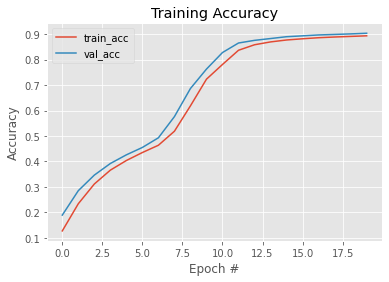

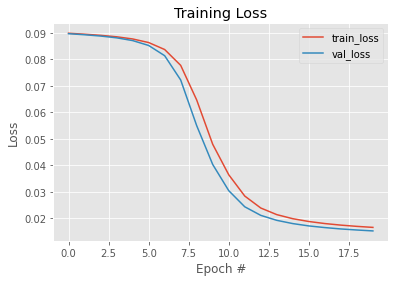

In [35]:
model.compile(loss=loss(), optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size)
plot_trainingAccLoss(H)

In [45]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model2.add(Conv2D(32, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10, activation="softmax"))

Epoch 1/20
469/469 [==============================] - 33s 71ms/step - loss: 0.7300 - accuracy: 0.1300 - val_loss: 0.7297 - val_accuracy: 0.1145
Epoch 2/20
469/469 [==============================] - 33s 69ms/step - loss: 0.7295 - accuracy: 0.0897 - val_loss: 0.7293 - val_accuracy: 0.0773
Epoch 3/20
469/469 [==============================] - 32s 69ms/step - loss: 0.7291 - accuracy: 0.0550 - val_loss: 0.7289 - val_accuracy: 0.0422
Epoch 4/20
469/469 [==============================] - 32s 69ms/step - loss: 0.7287 - accuracy: 0.0288 - val_loss: 0.7284 - val_accuracy: 0.0191
Epoch 5/20
469/469 [==============================] - 33s 70ms/step - loss: 0.7281 - accuracy: 0.0143 - val_loss: 0.7277 - val_accuracy: 0.0094
Epoch 6/20
469/469 [==============================] - 33s 70ms/step - loss: 0.7274 - accuracy: 0.0080 - val_loss: 0.7269 - val_accuracy: 0.0054
Epoch 7/20
469/469 [==============================] - 33s 70ms/step - loss: 0.7265 - accuracy: 0.0048 - val_loss: 0.7260 - val_accuracy:

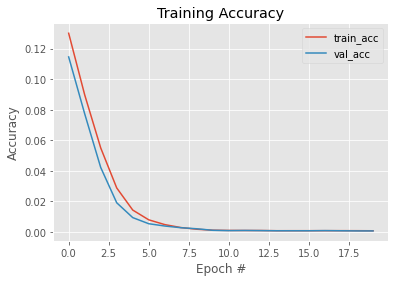

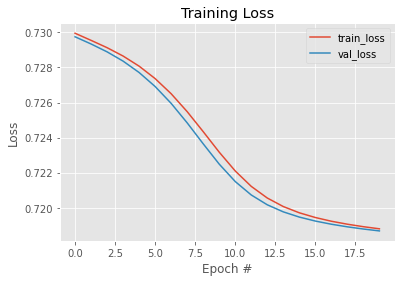

In [46]:
import tensorflow_addons as tfa

model2.compile(loss=tfa.losses.contrastive_loss, optimizer=sgd, metrics=["accuracy"])
H2 = model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size)
plot_trainingAccLoss(H2)

TODO: Beschreibung